In [1]:
from lib import transient
from imp import reload
# reload(transient)

import os
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.colorbar as colorbar
import matplotlib.cm as cmx
from mpl_toolkits.axes_grid1 import make_axes_locatable


from scipy.optimize import curve_fit 

import pandas as pd

In [2]:
filepath = 'E:/data/RuCl3/mat/kerr_rotation/fluence_3.8K/'
files = os.listdir(filepath)

cutFreq = 0.01 # THz
t0 = 85
pump_spot = 80
probe_spot = 50

key_parameter = 'pump_energy'
description = ''

usebg = False
trs = []
k_parameters = []
data = {}
parameters = {}

if 'background.mat' in files:
    bg_trace = transient.Transient()
    bg_trace.import_file(filepath + 'background.mat', 
                           cleanData=False, 
                           key_parameter=key_parameter,description=description)
    files.remove('background.mat')
    bg_trace.crop_time_scale()
    bg_trace.shift_time(t0)
    bg_trace.filter_low_pass(cutFreq)
#     tr.flip_trace()
    bg_trace.remove_DC_offset()
    bg_trace.flip_time()
    usebg = True
    
for file in files:
    try:

        tr = transient.Transient()
        tr.import_file(filepath + file, 
                           cleanData=False, 
                           key_parameter=key_parameter,description=description)
        tr.pump_spot = pump_spot
        tr.probe_spot = probe_spot
        tr.calc_energy_densities()
        tr.crop_time_scale()
        tr.shift_time(t0)
        tr.filter_low_pass(cutFreq)
    #     tr.flip_trace()
        tr.remove_DC_offset()
        tr.flip_time()
        # save parameters
        trParameters = tr.get_metadata()
        for key, val in trParameters.items():
            try:
                parameters[key].append(val)
            except KeyError:
                parameters[key] = [val]
        analysis_log = parameters.pop('analysis_log')
        if usebg:
            tr.trace = tr.trace - bg_trace.trace
        k_parameters.append(float(getattr(tr,key_parameter)))

        data[getattr(tr,key_parameter)] = tr.trace       
    
#        tr.trace = np.divide(tr.trace,max(tr.trace))
    #     tr.trace = np.divide(tr.trace,tr.pump_power)
    except Exception as exc:
        print('skipped file: {0}\nerror: {1}'.format(file,exc))
data = pd.DataFrame(data,index=tr.time)
print(data)
parameter_dataframe = pd.DataFrame(parameters, index = k_parameters)
analysis_log_dataframe = pd.DataFrame(analysis_log, index = k_parameters)
print(parameter_dataframe)
# for key, val in parameters.items():
#     print(str(key) + ': ')
#     print(val)

print('Imported {0} scan(s) as {1} dependence'.format(len(trs),tr.key_parameter))
data.plot(colormap='rainbow')


background.mat
Ru3Cl-Pu-0.005-pr-0.2-1kAVG-T-3.8K-kerr.mat
0.001
0.072
Ru3Cl-Pu-0.01-pr-0.2-1kAVG-T-3.8K-kerr.mat
0.001
0.072
Ru3Cl-Pu-0.02-pr-0.2-1kAVG-T-3.8K-kerr.mat
0.003
0.072
Ru3Cl-Pu-0.04-pr-0.2-1kAVG-T-3.8K-kerr.mat
0.006
0.072
Ru3Cl-Pu-0.08-pr-0.2-1kAVG-T-3.8K-kerr.mat
0.011
0.072
Ru3Cl-Pu-0.16-pr-0.2-1kAVG-T-3.8K-kerr.mat
0.022
0.072
Ru3Cl-Pu-0.32-pr-0.2-1kAVG-T-3.8K-kerr.mat
0.045
0.072
Ru3Cl-Pu-0.64-pr-0.2-1kAVG-T-3.8K-kerr.mat
0.09
0.072
Ru3Cl-Pu-1.2-pr-0.2-1kAVG-T-3.8K-kerr.mat
0.169
0.072
Ru3Cl-Pu-2.4-pr-0.2-1kAVG-T-3.8K-kerr.mat
0.337
0.072
Ru3Cl-Pu-4.8-pr-0.2-1kAVG-T-3.8K-kerr.mat
0.675
0.072
                   0.001         0.003         0.006         0.011  \
-6.300199   3.073390e-06  1.333444e-06 -8.752352e-07 -2.021428e-06   
-6.300183   2.996535e-06  1.363688e-06 -8.637341e-07 -2.047098e-06   
-6.300157   2.857641e-06  1.403662e-06 -9.263910e-07 -2.116642e-06   
-6.300118   2.655707e-06  1.402789e-06 -1.105271e-06 -2.247647e-06   
-6.300069   2.456185e-06  1.35774

In [8]:
data.to_csv('e:/data/RuCl3/csv/low_temp_low_fluence.csv')

In [33]:
savepath = 'E:/data/RuCl3/HDF5/'
name = 'kerr_4K_fluence_dependence'
data.to_hdf(savepath + name + '.hdf5', 'data', mode="w")
parameter_dataframe.to_hdf(savepath + name + '.hdf5', 'parameters', mode='a')
# analysis_log_dataframe.to_hdf(savepath + name + '.hdf5', 'analysis_log', mode='a')
data.to_csv(savepath + name + '.csv')


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:1138: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->['date', 'description', 'key_parameter', 'material', 'name', 'original_filepath', 'other']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [29]:
data1 = pd.DataFrame()

In [75]:
data1 = pd.read_hdf(savepath + name + '.hdf5', 'data')

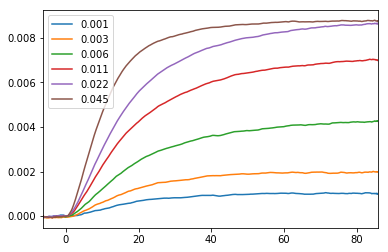

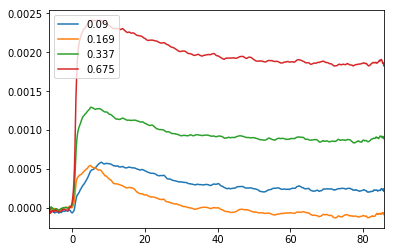

In [147]:
data1 = data[data.columns[0:6]]
data2 = data[data.columns[6:12]]
data1.plot()
data2.plot()

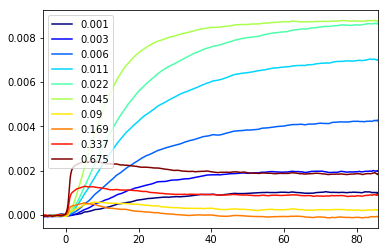

In [231]:

data.plot(colormap='jet')


In [47]:
    trace=trace1[1]
    Time=trace1[0]
    guess=( 0.01,1.68,0.1,0.4,-0.27,0.2)
    #       t,taupulse,taudecay,linearconst,A,C,t_zero
    plt.plot(Time,trace)
    popt, pcov = sp.optimize.curve_fit(fitFunction,Time,trace,p0=guess)
    popt=1
    #fig=plt.figure('fittings')
    #plt.clf()
    #plt.plot(Time,fitFunction(Time, *popt))
    #plt.plot(trace[1],fitFunction(trace[1], 0.16,1.63,0.0011,0.4,-0.27,0.2))
    #plt.plot(Time,trace - fitFunction(Time,  *popt))
    #plt.show()
    return(popt)

NameError: name 'trace1' is not defined

In [102]:
def expfunc_const(x, A, t0, c):
    labels = ['A', 't0', 'c']
    func = A * (1 - np.exp(- x / t0)) + c
    return func

In [122]:
def double_exponential_pos_neg(x, A1, t1, A2, t2, d):
    labels = ['A1', 't1', 'A2', 't2', 'c', 'd']
    func = A1 * (1 - np.exp(- x / t1)) + A2 * (1 - np.exp(- x / t2)) + d
    return func

In [149]:
def expFunc_lin_const(x, A, t0, c, d):
    labels = ['A', 't0', 'c', 'd']
    func = A * (1 - np.exp(- x / t0)) + c * x + d
    return func, labels

5265
5265
5265
5265
5265
5265
0.001 [  1.17371267e-03   1.85213950e+01  -1.28340284e-04] [  1.07765182e-10  -1.29505644e-07  -1.06089726e-10]
0.003 [  2.27835821e-03   1.85127230e+01  -2.63923800e-04] [  1.07765182e-10  -1.29505644e-07  -1.06089726e-10]
0.006 [  4.73021685e-03   2.23915565e+01  -3.76634946e-04] [  1.07765182e-10  -1.29505644e-07  -1.06089726e-10]
0.011 [  7.67969463e-03   2.10194676e+01  -5.43127342e-04] [  1.07765182e-10  -1.29505644e-07  -1.06089726e-10]
0.022 [  9.43646531e-03   1.89305618e+01  -7.19213405e-04] [  1.07765182e-10  -1.29505644e-07  -1.06089726e-10]
0.045 [  9.83679429e-03   1.12689093e+01  -1.07126153e-03] [  1.07765182e-10  -1.29505644e-07  -1.06089726e-10]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:26: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


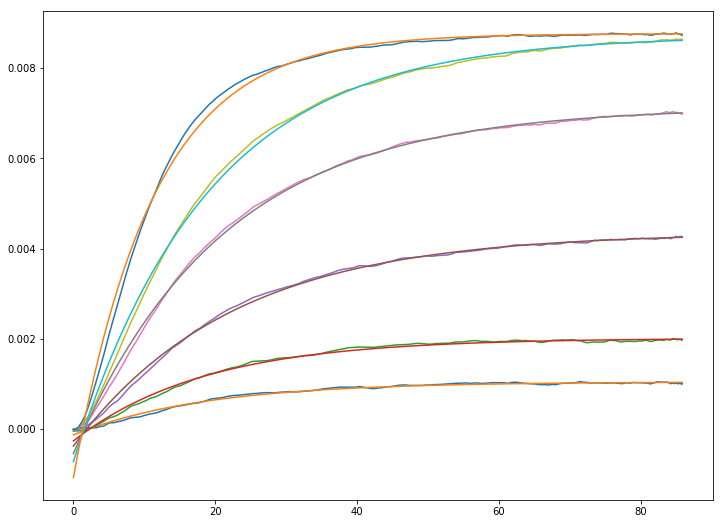

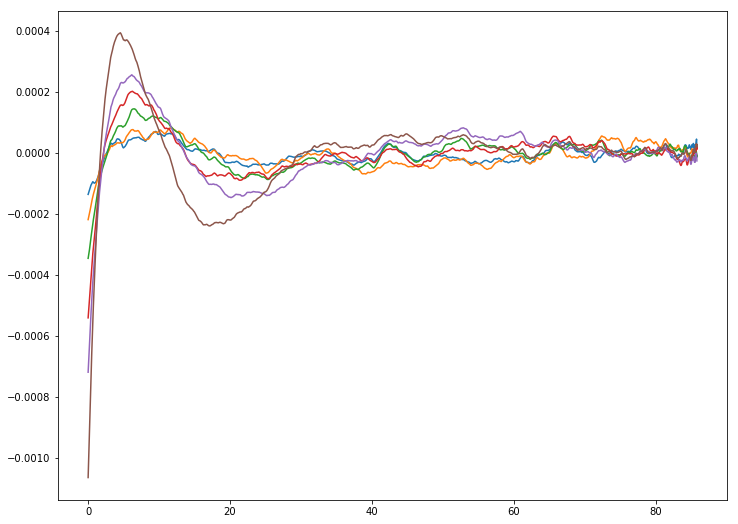

In [117]:
xdata = data1.index.tolist()
popts={}
pcovs={}
fig = plt.figure(figsize=(12,9))
fits = {}
substr = {}
for column in data1:
    ydata = data1.loc[0:xdata[-1],column].tolist()
    print(len(ydata))
    x = np.array(xdata[-len(ydata)-1:-1])
    y = np.array(ydata)
    plt.plot(x,y)
    
    popt, pcov = curve_fit(expfunc_const,x,y) #,p0=guess
    popts[column] = popt
    pcovs[column] = pcov
    fits[column] = expfunc_const(x, *popt)
    substr[column] = fits[column] - y
    plt.plot(x, expfunc_const(x, *popt), '-')
    
    
fig2 = plt.figure(figsize=(12,9))
for key,val in substr.items():
    plt.plot(x,val,label=key)
for key,val in popts.items():
    print(key,val,pcov[key])
    


# using double_exponential_pos_neg


5265
5265
5265
5265
5265
5265
             A1             t1        A2         t2         d
0.001  0.001485      14.530739 -0.000483   3.838586  0.000024
0.003  0.002991      14.563470 -0.000939   5.280026 -0.000071
0.006  0.004991      20.488110 -0.000694   2.263541  0.000009
0.011  0.007983      19.722849 -0.000958   1.703150  0.000059
0.022  0.009893      17.658319 -0.001309   1.702298  0.000076
0.045  1.440849 -669106.733946  0.009951  11.599819 -0.001033


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


TypeError: unhashable type: 'slice'

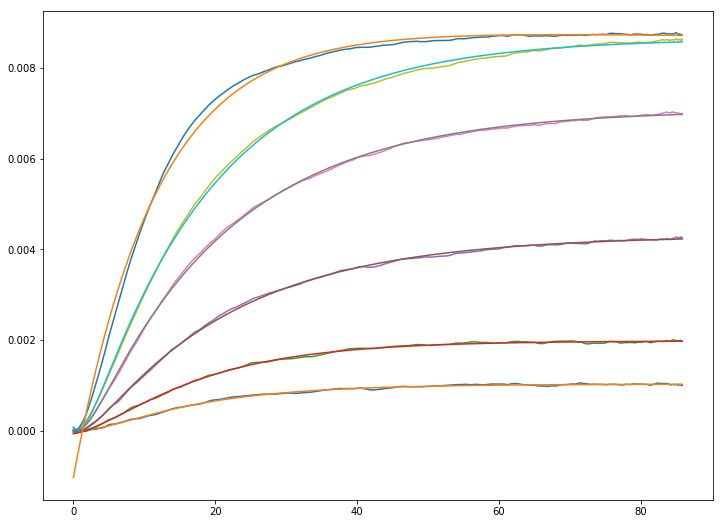

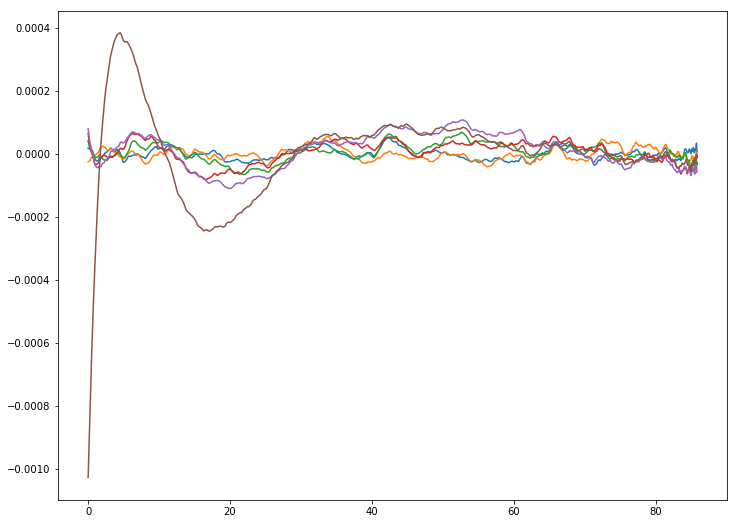

In [145]:
xdata = data1.index.tolist()
popts={}
pcovs={}
fig = plt.figure(figsize=(12,9))
fits = {}
substr = {}
labels=['A1', 't1', 'A2', 't2', 'd']
for column in data1:
    ydata = data1.loc[0:xdata[-1],column].tolist()
    print(len(ydata))
    x = np.array(xdata[-len(ydata)-1:-1])
    y = np.array(ydata)
    plt.plot(x,y)
    
    popt, pcov = curve_fit(double_exponential_pos_neg,x,y,p0=(0.001,20,0,0.001,1)) #,p0=guess
    popts[column] = popt
    pcovs[column] = pcov
    fits[column] = double_exponential_pos_neg(x, *popt)
    substr[column] = fits[column] - y
    plt.plot(x, double_exponential_pos_neg(x, *popt), '-',)
    labels.append(column)
    
fig2 = plt.figure(figsize=(12,9))

for key,val in substr.items():
    plt.plot(x,val,label=key)
poptsdf = pd.DataFrame(popts).transpose()
poptsdf.columns = ['A1', 't1', 'A2', 't2', 'd']

print(poptsdf)
fig3 = plt.figure()
for column in poptsdf[:,'A1':'t2']:
    poptsdf[column].plot()


# for key,val in popts.items():
#     print(key,val,pcov[key])
    


# fit function for electronic stuff

In [158]:
def negexpfunc_const(x, A, t0, c):
    labels = ['A', 't0', 'c']
    func = - A * (np.exp(- x / t0)) + c
    return func

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


             A1         t1        A2        t2         d
0.001  0.001485  14.530739 -0.000483  3.838586  0.000024
0.003  0.002991  14.563470 -0.000939  5.280026 -0.000071
0.006  0.004991  20.488110 -0.000694  2.263541  0.000009
0.011  0.007983  19.722849 -0.000958  1.703150  0.000059
0.022  0.009893  17.658319 -0.001309  1.702298  0.000076


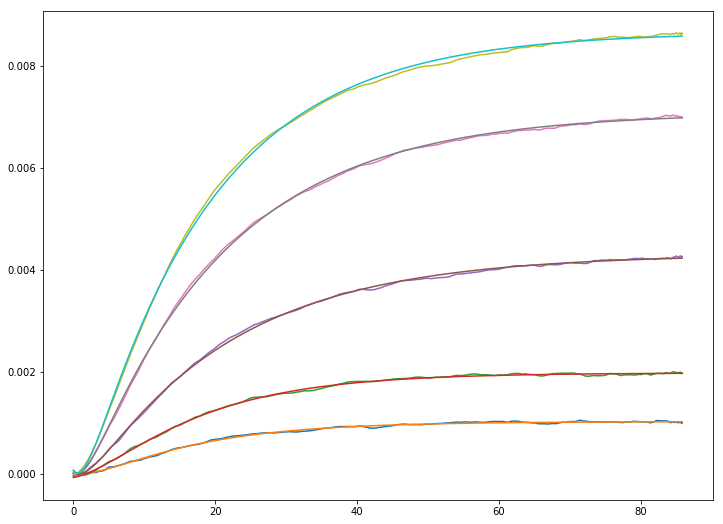

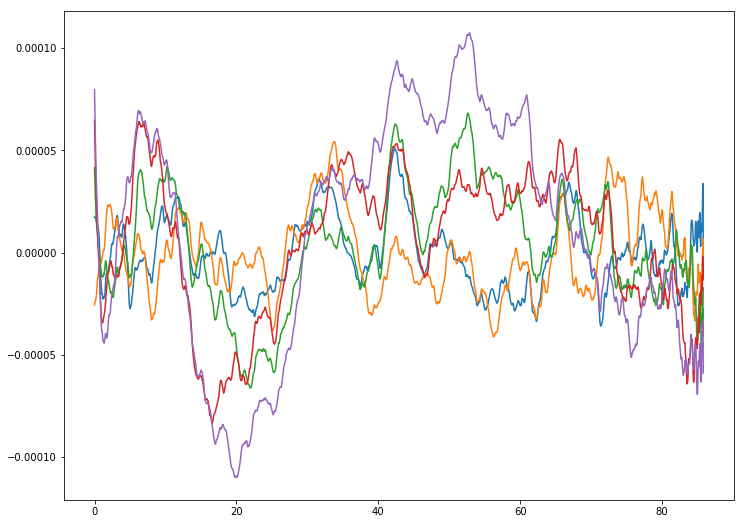

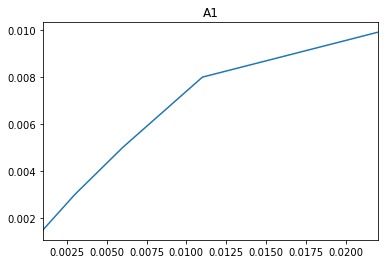

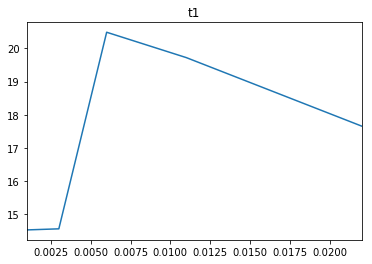

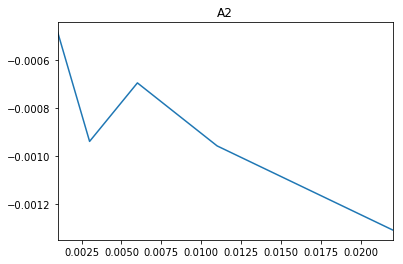

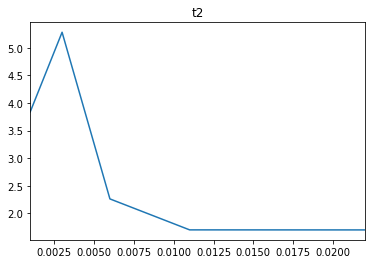

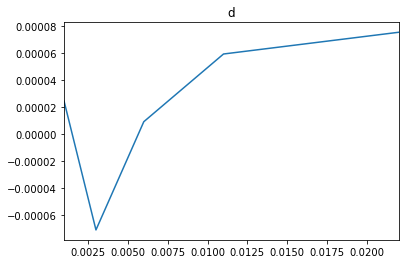

In [193]:
usedata = data[data.columns[0:5]]
fitfunction = double_exponential_pos_neg
fitlabels=['A1', 't1', 'A2', 't2', 'd']
guess = (0.001,20,0,0.001,1)

##############
xdata = usedata.index.tolist()
popts={}
pcovs={}
fig = plt.figure(figsize=(12,9))
fits = {}
substr = {}

for column in usedata:
    ydata = usedata.loc[0:xdata[-1],column].tolist()
    x = np.array(xdata[-len(ydata)-1:-1])
    y = np.array(ydata)
    plt.plot(x,y)
    
    popt, pcov = curve_fit(fitfunction,x,y,p0=guess) #,p0=guess
    popts[column] = popt
    pcovs[column] = pcov
    fits[column] = fitfunction(x, *popt)
    substr[column] = fits[column] - y
    plt.plot(x, fitfunction(x, *popt), '-',)
    labels.append(column)
    
fig2 = plt.figure(figsize=(12,9))

for key,val in substr.items():
    plt.plot(x,val,label=key)
poptsdf = pd.DataFrame(popts).transpose()
poptsdf.columns = fitlabels

print(poptsdf)
for column in poptsdf:
    plt.figure()    
    poptsdf[column].plot(title=column)


# single exponential fit

             A1         t1         d
0.001  0.001174  18.521397 -0.000128
0.003  0.002278  18.512714 -0.000264
0.006  0.004730  22.391563 -0.000377
0.011  0.007680  21.019466 -0.000543
0.022  0.009436  18.930558 -0.000719
0.045  0.009837  11.268903 -0.001071
6 6
[ 0.01045759  0.0083734  -0.000383  ]
6 6
[-187.38559679   21.18908884]


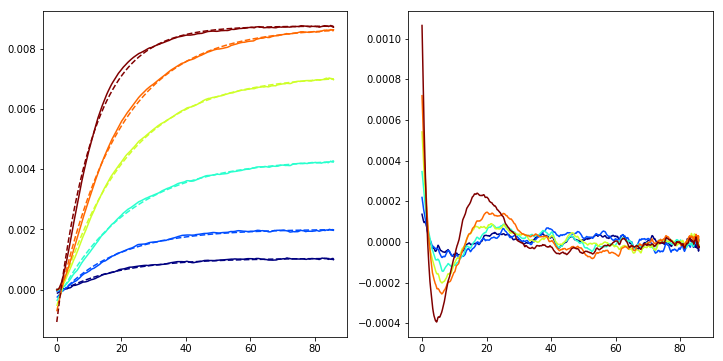

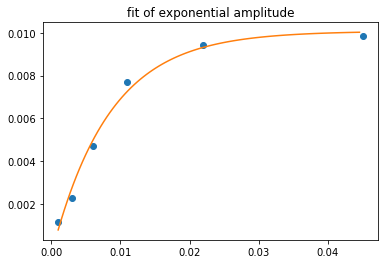

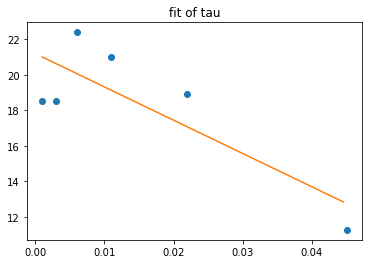

In [244]:
usedata = data[data.columns[0:6]]

def fitfunction(x, A, t0, c):
    return  A * (1 - np.exp(- x / t0)) + c

fitlabels=['A1', 't1', 'd']
guess = (0.001,20,0)
# def fitfunction(x, A, t0, tau):
#     return  A * (1 - np.exp(- (x-t0) / tau)) 

# fitlabels=['A1', 't1', 'tau']
# guess = (0.001,1,20)

##############
xdata = usedata.index.tolist()
popts={}
pcovs={}
# fig = plt.figure(figsize=(12,6))
# ax1 = fig.add_subplot(1,2,1)
# ax2 = fig.add_subplot(1,2,2)
fits = {}
substr = {}

# figsize = layout.figaspect()
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
color_idx = np.linspace(0, 1, len(usedata.columns))

for i, column in zip(color_idx, usedata):
    
    ydata = usedata.loc[0:xdata[-1],column].tolist()
    x = np.array(xdata[-len(ydata)-1:-1])
    y = np.array(ydata)
    ax1.plot(x,y,color=plt.cm.jet(i),)
    
    popt, pcov = curve_fit(fitfunction,x,y,p0=guess) #,p0=guess
    popts[column] = popt
    pcovs[column] = pcov
    fits[column] = fitfunction(x, *popt)
    substr[column] =y - fits[column] 
    ax1.plot(x, fitfunction(x, *popt), '--',color=plt.cm.jet(i))
    labels.append(column)
    

for i, key in zip(color_idx, substr):
    ax2.plot(x,substr[key],label=key,color=plt.cm.jet(i))
poptsdf = pd.DataFrame(popts).transpose()
poptsdf.columns = fitlabels

print(poptsdf)
# fig = plt.figure()    
# nfigs = len(poptsdf.columns)
# print(nfigs)
x = poptsdf.index.tolist()

def parfitfunc(x, A, t0, c):
    return  A * (1 - np.exp(- x / t0)) + c
fig = plt.figure()
y= poptsdf['A1'].tolist()
print(len(x),len(y))
plt.plot(x,y,'o')
popt,pcov = curve_fit(parfitfunc,x,y,p0=(0.01,0.02,0))
xfit = np.arange(x[0],x[-1],(x[-1]-x[0])/100)
plt.plot(xfit,parfitfunc(xfit, *popt))
plt.title('fit of exponential amplitude')
print(popt)

def parfitfunc(x, A, b):
    return  A * x + b
plt.figure()
y= poptsdf['t1'].tolist()
print(len(x),len(y))
plt.plot(x,y,'o')
popt,pcov = curve_fit(parfitfunc,x,y,p0=(-200, 1))
xfit = np.arange(x[0],x[-1],(x[-1]-x[0])/100)
plt.plot(xfit,parfitfunc(xfit, *popt))
plt.title('fit of tau')
print(popt)



             A1        t1        tau
0.001  0.001045  2.144767  18.521336
0.003  0.002014  2.279229  18.512697
0.006  0.004354  1.857874  22.391560
0.011  0.007137  1.541734  21.019467
0.022  0.008717  1.500767  18.930559
0.045  0.008766  1.299335  11.268907


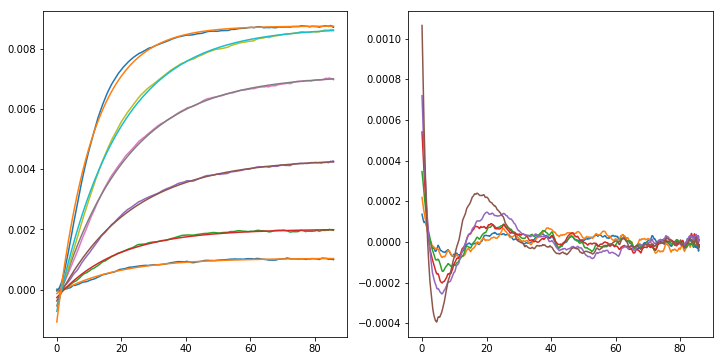

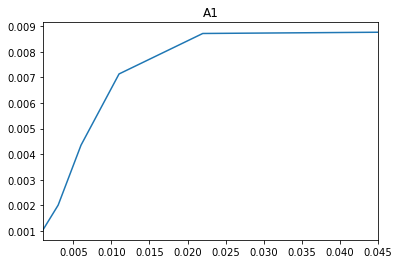

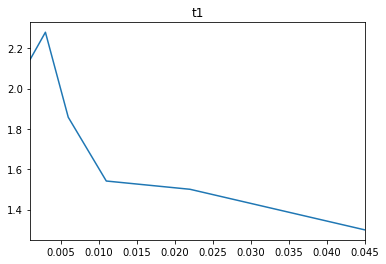

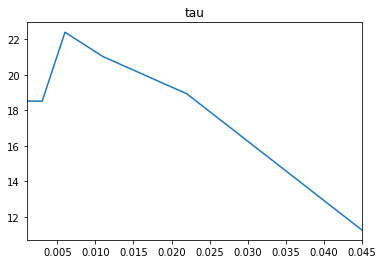

In [207]:
usedata = data[data.columns[0:6]]

# def fitfunction(x, A, t0, c):
#     return  A * (1 - np.exp(- x / t0)) + c

# fitlabels=['A1', 't1', 'd']
# guess = (0.001,20,0)
def fitfunction(x, A, t0, tau):
    return  A * (1 - np.exp(- (x-t0) / tau)) 

fitlabels=['A1', 't1', 'tau']
guess = (0.001,1,20)

##############
xdata = usedata.index.tolist()
popts={}
pcovs={}
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
fits = {}
substr = {}

for column in usedata:
    ydata = usedata.loc[0:xdata[-1],column].tolist()
    x = np.array(xdata[-len(ydata)-1:-1])
    y = np.array(ydata)
    ax1.plot(x,y)
    
    popt, pcov = curve_fit(fitfunction,x,y,p0=guess) #,p0=guess
    popts[column] = popt
    pcovs[column] = pcov
    fits[column] = fitfunction(x, *popt)
    substr[column] =y - fits[column] 
    ax1.plot(x, fitfunction(x, *popt), '-',)
    labels.append(column)
    

for key,val in substr.items():
    ax2.plot(x,val,label=key)
poptsdf = pd.DataFrame(popts).transpose()
poptsdf.columns = fitlabels

print(poptsdf)
# fig = plt.figure()    
# nfigs = len(poptsdf.columns)
# print(nfigs)
for column in poptsdf:
    plt.figure()    
    poptsdf[column].plot(title=column)


# New analysis: setting up for simple import of datasets


In [ ]:
filepath = 'E:/data/RuCl3/mat/kerr_rotation/fluence_3.8K/'

cutFreq = 0.01 # THz
t0 = 85
pump_spot = 80
probe_spot = 50

key_parameter = 'pump_energy'
description = ''

files = os.listdir(filepath)
usebg = False
trs = []
k_parameters = []
data = {}
parameters = {}



if 'background.mat' in files:
    bg_trace = transient.Transient()
    bg_trace.import_file(filepath + 'background.mat', 
                           cleanData=False, 
                           key_parameter=key_parameter,description=description)
    files.remove('background.mat')
    bg_trace.crop_time_scale()
    bg_trace.shift_time(t0)
    bg_trace.filter_low_pass(cutFreq)
#     tr.flip_trace()
    bg_trace.remove_DC_offset()
    bg_trace.flip_time()
    usebg = True
    
for file in files:
    try:

        tr = transient.Transient()
        tr.import_file(filepath + file, 
                           cleanData=False, 
                           key_parameter=key_parameter,description=description)
        tr.pump_spot = pump_spot
        tr.probe_spot = probe_spot
        tr.calc_energy_densities()
        tr.crop_time_scale()
        tr.shift_time(t0)
        tr.filter_low_pass(cutFreq)
    #     tr.flip_trace()
        tr.remove_DC_offset()
        tr.flip_time()
        # save parameters
        trParameters = tr.get_metadata()
        for key, val in trParameters.items():
            try:
                parameters[key].append(val)
            except KeyError:
                parameters[key] = [val]
        analysis_log = parameters.pop('analysis_log')
        if usebg:
            tr.trace = tr.trace - bg_trace.trace
        k_parameters.append(float(getattr(tr,key_parameter)))

        data[getattr(tr,key_parameter)] = tr.trace       
    
#        tr.trace = np.divide(tr.trace,max(tr.trace))
    #     tr.trace = np.divide(tr.trace,tr.pump_power)
    except Exception as exc:
        print('skipped file: {0}\nerror: {1}'.format(file,exc))
data = pd.DataFrame(data,index=tr.time)
print(data)
parameter_dataframe = pd.DataFrame(parameters, index = k_parameters)
analysis_log_dataframe = pd.DataFrame(analysis_log, index = k_parameters)
print(parameter_dataframe)
# for key, val in parameters.items():
#     print(str(key) + ': ')
#     print(val)

print('Imported {0} scan(s) as {1} dependence'.format(len(trs),tr.key_parameter))
data.plot(colormap='rainbow')


In [2]:
if asd:
    print(True)

NameError: name 'asd' is not defined

In [3]:
pd.DataFrame([1,2,3], index=['a','b','c'])

,0
a,1
b,2
c,3


In [4]:
data


NameError: name 'data' is not defined

In [5]:
filepath = 'E:/data/RuCl3/mat/2018-03-08/'
files = os.listdir(filepath)

cutFreq = 0.01 # THz
t0 = 85
pump_spot = 80
probe_spot = 50

key_parameter = 'pump_energy'
description = ''

usebg = False
trs = []
k_parameters = []
data = {}
parameters = {}

if 'background.mat' in files:
    bg_trace = transient.Transient()
    bg_trace.import_file(filepath + 'background.mat', 
                           cleanData=False, 
                           key_parameter=key_parameter,description=description)
    files.remove('background.mat')
    bg_trace.crop_time_scale()
    bg_trace.shift_time(t0)
    bg_trace.filter_low_pass(cutFreq)
#     tr.flip_trace()
    bg_trace.remove_DC_offset()
    bg_trace.flip_time()
    usebg = True
    
for file in files:
    try:

        tr = transient.Transient()
        tr.import_file(filepath + file, 
                           cleanData=False, 
                           key_parameter=key_parameter,description=description)
        tr.pump_spot = pump_spot
        tr.probe_spot = probe_spot
        tr.calc_energy_densities()
        tr.crop_time_scale()
        tr.shift_time(t0)
        tr.filter_low_pass(cutFreq)
    #     tr.flip_trace()
        tr.remove_DC_offset()
        tr.flip_time()
        # save parameters
        trParameters = tr.get_metadata()
        for key, val in trParameters.items():
            try:
                parameters[key].append(val)
            except KeyError:
                parameters[key] = [val]
        analysis_log = parameters.pop('analysis_log')
        if usebg:
            tr.trace = tr.trace - bg_trace.trace
        k_parameters.append(float(getattr(tr,key_parameter)))

        data[getattr(tr,key_parameter)] = tr.trace       
    
#        tr.trace = np.divide(tr.trace,max(tr.trace))
    #     tr.trace = np.divide(tr.trace,tr.pump_power)
    except Exception as exc:
        print('skipped file: {0}\nerror: {1}'.format(file,exc))
data = pd.DataFrame(data,index=tr.time)
print(data)
parameter_dataframe = pd.DataFrame(parameters, index = k_parameters)
analysis_log_dataframe = pd.DataFrame(analysis_log, index = k_parameters)
print(parameter_dataframe)
# for key, val in parameters.items():
#     print(str(key) + ': ')
#     print(val)

print('Imported {0} scan(s) as {1} dependence'.format(len(trs),tr.key_parameter))
data.plot(colormap='rainbow')


background.mat
RuCl3-pr-0.2-T-3.85k-pu-0.05-mW-10000-AVG.mat
0.007
0.072
RuCl3-pr-0.2-T-3.85k-pu-0.1-mW-10000-AVG.mat
0.014
0.072
RuCl3-pr-0.2-T-3.85k-pu-0.2-mW-5000-AVG.mat
0.028
0.072
RuCl3-pr-0.2-T-3.85k-pu-0.5-mW-1000-AVG.mat
0.07
0.072
t-cal.mat
skipped file: t-cal.mat
error: index 2 is out of bounds for axis 0 with size 2


ValueError: Shape of passed values is (4, 6468), indices imply (4, 0)